In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import SGDRegressor


In [3]:
# Read the data
df_train = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv', index_col='Id')
df_test = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv', index_col='Id')

In [4]:
df_train.dropna(axis=0, subset=['SalePrice'], inplace=True)

In [5]:
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 1461 to 2919
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1455 non-null   object 
 2   LotFrontage    1232 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   Alley          107 non-null    object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1457 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearB

In [7]:
# show columns that has null values and the type of values in column
def Column_With_Null_and_Type(df):
    cols=[]
    for col in df.columns:
        if df[col].isnull().any():
            cols.append(col)
            print(f"{col}\t{df[col].isnull().sum()}\t type: {df[col].dtype}")
    return cols

In [8]:
#show nulls for train data
cols_with_null1=Column_With_Null_and_Type(df_train)

LotFrontage	259	 type: float64
Alley	1369	 type: object
MasVnrType	8	 type: object
MasVnrArea	8	 type: float64
BsmtQual	37	 type: object
BsmtCond	37	 type: object
BsmtExposure	38	 type: object
BsmtFinType1	37	 type: object
BsmtFinType2	38	 type: object
Electrical	1	 type: object
FireplaceQu	690	 type: object
GarageType	81	 type: object
GarageYrBlt	81	 type: float64
GarageFinish	81	 type: object
GarageQual	81	 type: object
GarageCond	81	 type: object
PoolQC	1453	 type: object
Fence	1179	 type: object
MiscFeature	1406	 type: object


In [9]:
#show nulls for train data
cols_with_null2=Column_With_Null_and_Type(df_test)

MSZoning	4	 type: object
LotFrontage	227	 type: float64
Alley	1352	 type: object
Utilities	2	 type: object
Exterior1st	1	 type: object
Exterior2nd	1	 type: object
MasVnrType	16	 type: object
MasVnrArea	15	 type: float64
BsmtQual	44	 type: object
BsmtCond	45	 type: object
BsmtExposure	44	 type: object
BsmtFinType1	42	 type: object
BsmtFinSF1	1	 type: float64
BsmtFinType2	42	 type: object
BsmtFinSF2	1	 type: float64
BsmtUnfSF	1	 type: float64
TotalBsmtSF	1	 type: float64
BsmtFullBath	2	 type: float64
BsmtHalfBath	2	 type: float64
KitchenQual	1	 type: object
Functional	2	 type: object
FireplaceQu	730	 type: object
GarageType	76	 type: object
GarageYrBlt	78	 type: float64
GarageFinish	78	 type: object
GarageCars	1	 type: float64
GarageArea	1	 type: float64
GarageQual	78	 type: object
GarageCond	78	 type: object
PoolQC	1456	 type: object
Fence	1169	 type: object
MiscFeature	1408	 type: object
SaleType	1	 type: object


#### Fill The Null Values In The Train And Test Data

In [10]:
df_train['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [11]:
# Fill The Null Values in Train Data
df_train['LotFrontage'].fillna(df_train['LotFrontage'].mean(),inplace=True)
df_train['LotFrontage'].isnull().sum()

0

In [12]:
# Remove the 'LotFrontage' From The List OF cols
# The Remain Of The Cols Will Be Filled With 0 Because The Null Value Has a mean in describtion
cols_with_null1.remove('LotFrontage')
print(cols_with_null1)
df_train.fillna(0,inplace=True)

['Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


In [13]:
#shows No Null Values In Train Data 
Column_With_Null_and_Type(df_train)

[]

In [14]:
for col in cols_with_null2:
    if (col in cols_with_null1)or(df_test[col].dtype=='object'):
        df_test[col].fillna(0,inplace=True)
    else:
        df_test[col].fillna(df_test[col].mean(),inplace=True)

In [15]:
#shows No Null Values In Test Data 
Column_With_Null_and_Type(df_test)

[]

### Process The Categorical Columns

In [16]:
# categorical columns names
categorical_column = [cname for cname in df_train.columns if 
                df_train[cname].dtype =='object' ]

print('The Categorical Columns: ',categorical_column)
print('\nThe Number Of Names= ',len(categorical_column))

The Categorical Columns:  ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

The Number Of Names=  43


In [17]:
for col in categorical_column:
    print(df_train[col].unique(),"\n")

['RL' 'RM' 'C (all)' 'FV' 'RH'] 

['Pave' 'Grvl'] 

[0 'Grvl' 'Pave'] 

['Reg' 'IR1' 'IR2' 'IR3'] 

['Lvl' 'Bnk' 'Low' 'HLS'] 

['AllPub' 'NoSeWa'] 

['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3'] 

['Gtl' 'Mod' 'Sev'] 

['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste'] 

['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe'] 

['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe'] 

['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs'] 

['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin'] 

['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed'] 

['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile'] 

['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywood' 'AsbShng' 'Stucco' 'BrkComm' 'AsphShn' 'Stone' 'ImStucc'
 'CBlock'] 


In [18]:
## The Columns That are Ordinal
ordinal_column=['ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure','GarageFinish','HeatingQC','KitchenQual',
               'FireplaceQu','GarageQual','GarageCond','PoolQC']

for col in ordinal_column:
    print(col," : ",df_train[col].unique(),"\n")

ExterQual  :  ['Gd' 'TA' 'Ex' 'Fa'] 

ExterCond  :  ['TA' 'Gd' 'Fa' 'Po' 'Ex'] 

BsmtQual  :  ['Gd' 'TA' 'Ex' 0 'Fa'] 

BsmtCond  :  ['TA' 'Gd' 0 'Fa' 'Po'] 

BsmtExposure  :  ['No' 'Gd' 'Mn' 'Av' 0] 

GarageFinish  :  ['RFn' 'Unf' 'Fin' 0] 

HeatingQC  :  ['Ex' 'Gd' 'TA' 'Fa' 'Po'] 

KitchenQual  :  ['Gd' 'TA' 'Ex' 'Fa'] 

FireplaceQu  :  [0 'TA' 'Gd' 'Fa' 'Ex' 'Po'] 

GarageQual  :  ['TA' 'Fa' 'Gd' 0 'Ex' 'Po'] 

GarageCond  :  ['TA' 'Fa' 0 'Gd' 'Po' 'Ex'] 

PoolQC  :  [0 'Ex' 'Fa' 'Gd'] 



#### Plot The COlumns With Prices

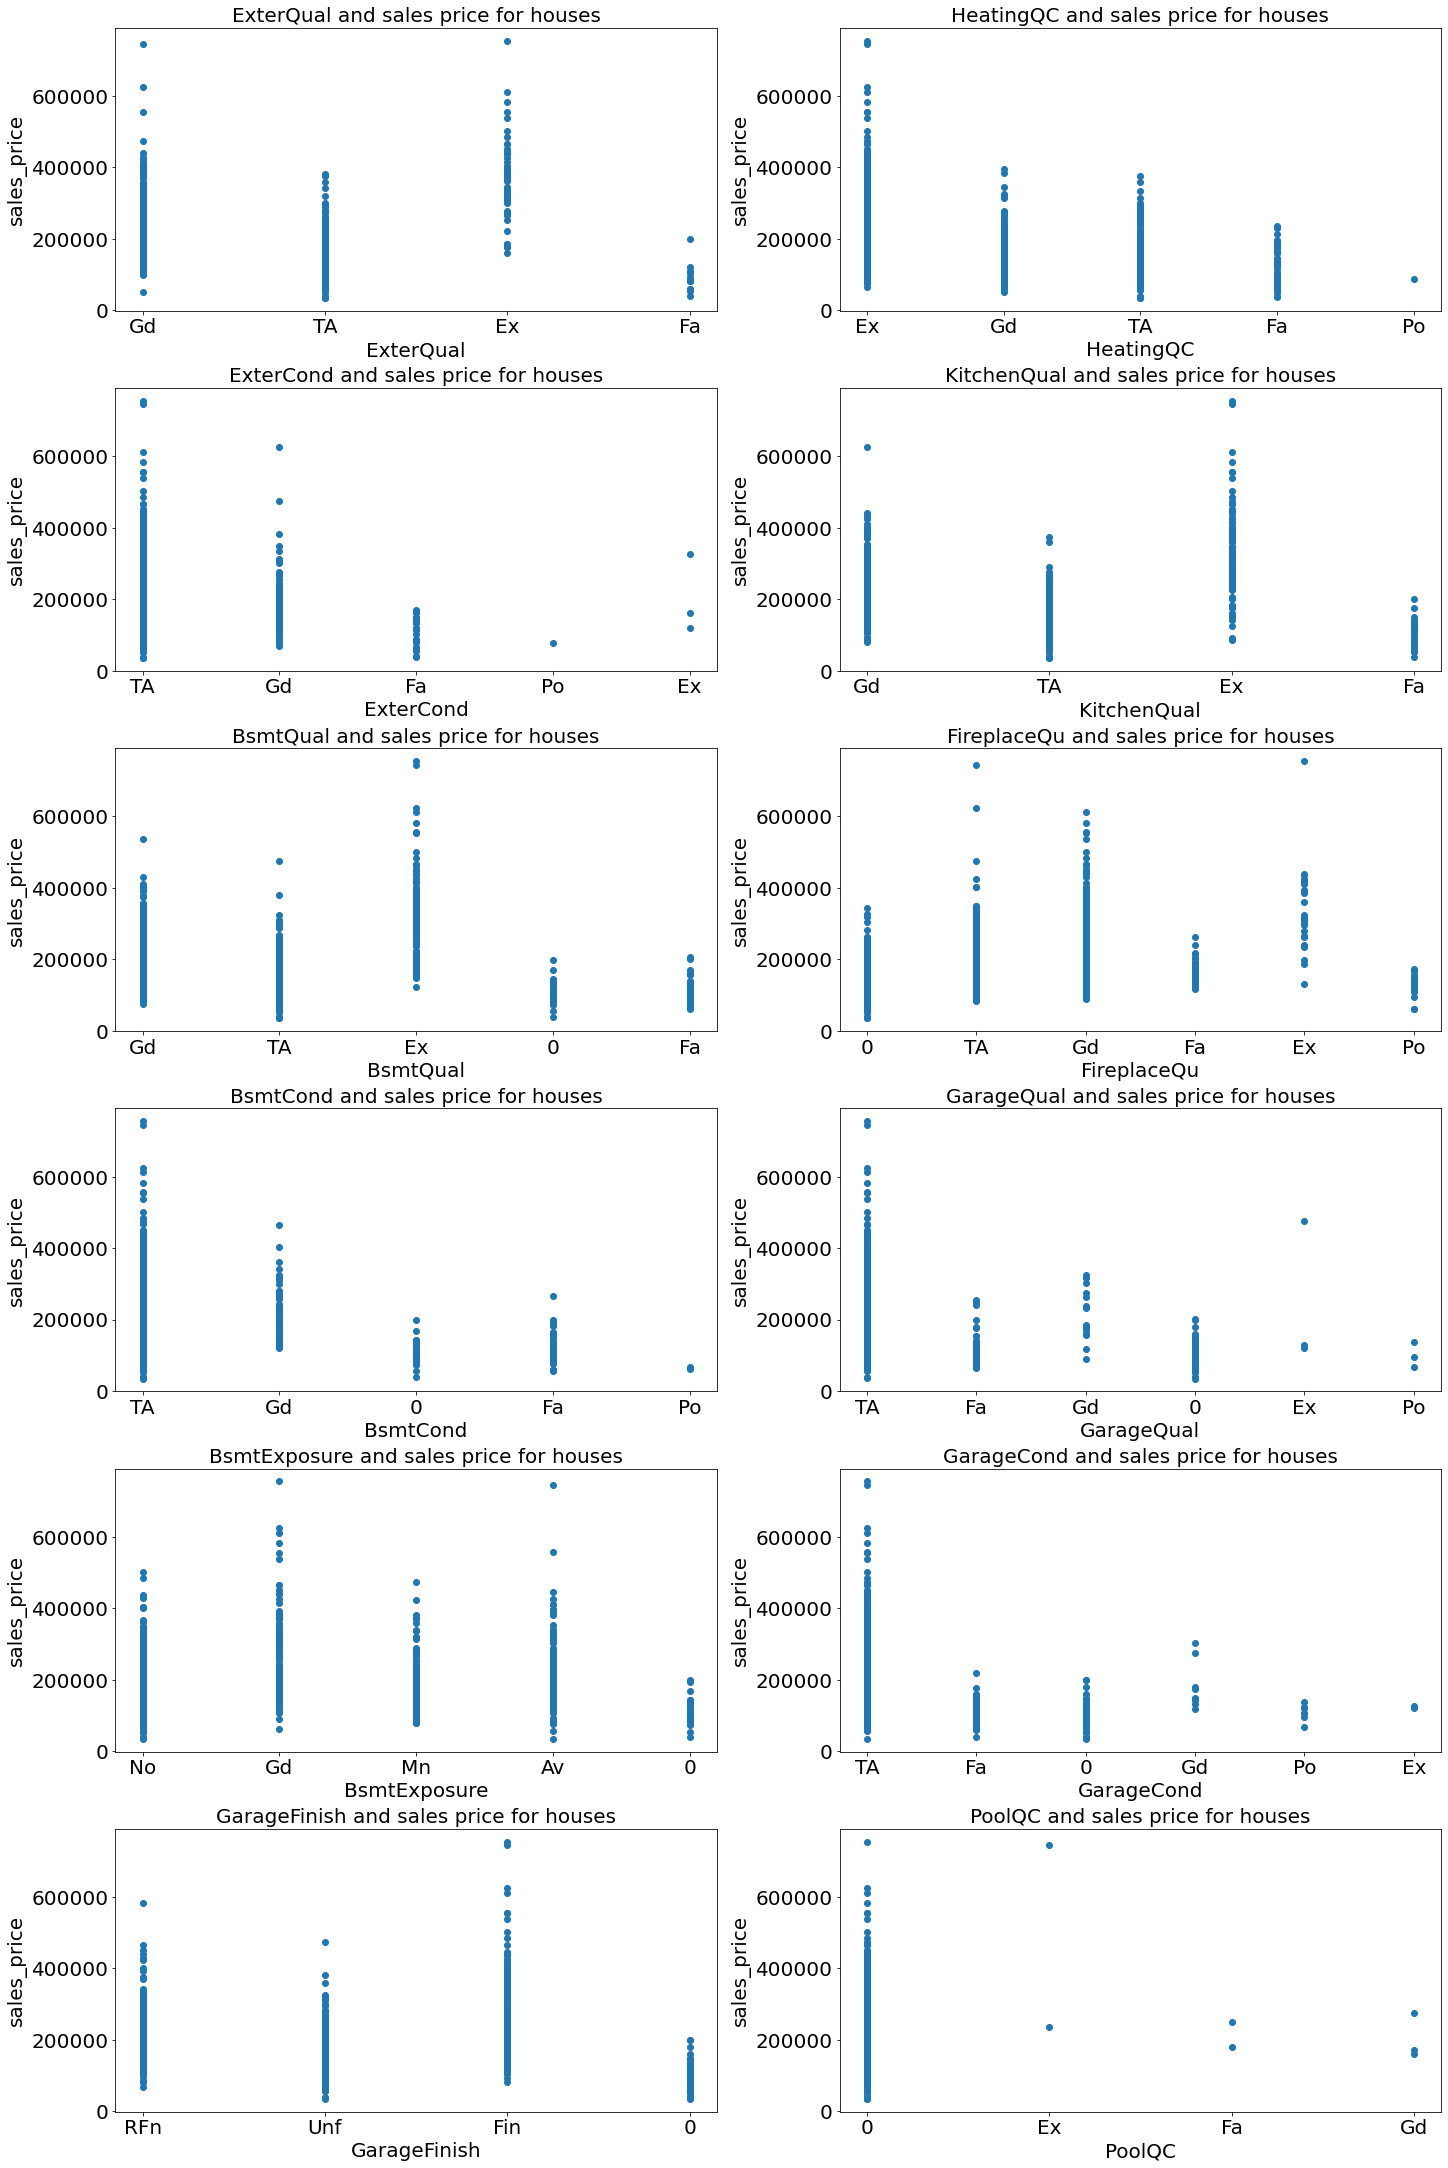

In [19]:
#plot the Ordinal Column With The Sales Price
fig = plt.figure(constrained_layout=True,figsize=(20,30))
axs =fig.subplots(nrows=6, ncols=2)
count=0
for i in range(2):
    for j in range(6):
        if(count)<len(ordinal_column):
            col=ordinal_column[count]
            count+=1
            axs[j,i].plot(list(df_train[col]),list(df_train['SalePrice']),'o')
            axs[j,i].set_title(col+" and sales price for houses",fontsize=20)
            axs[j,i].set_xlabel(col,fontsize=20)
            axs[j,i].set_ylabel("sales_price",fontsize=20)
            axs[j,i].tick_params(labelsize=20)

### Ordinal Encoding

In [20]:
# The Order of Ordinal Columns
first_ordinal_column=['ExterQual','ExterCond','BsmtQual','BsmtCond','HeatingQC','KitchenQual',
               'FireplaceQu','GarageQual','GarageCond','PoolQC']
order1=[0,'Po','Fa','TA','Gd','Ex']

# another Categorical Columns With Ordinal Data
ordina_column2=['BsmtExposure','GarageFinish']

# the Order Of The Number Mappig To The Order Of The List
ordercol=[[0,'No','Mn','Av','Gd'],[0,'Unf','RFn','Fin']]

In [21]:
#Copy Of Ordinal Column From Train and Test Data
#Train Ordinal Data
Train_ordinal_df1=df_train[first_ordinal_column].copy()
#Test Ordinal Data
Test_ordinal_df2=df_test[first_ordinal_column].copy()

In [22]:
Train_ordinal_df1.head()

,ExterQual,ExterCond,BsmtQual,BsmtCond,HeatingQC,KitchenQual,FireplaceQu,GarageQual,GarageCond,PoolQC
Id,,,,,,,,,,
1,Gd,TA,Gd,TA,Ex,Gd,0,TA,TA,0
2,TA,TA,Gd,TA,Ex,TA,TA,TA,TA,0
3,Gd,TA,Gd,TA,Ex,Gd,TA,TA,TA,0
4,TA,TA,TA,Gd,Gd,Gd,Gd,TA,TA,0
5,Gd,TA,Gd,TA,Ex,Gd,TA,TA,TA,0


In [23]:
Test_ordinal_df2.head()

,ExterQual,ExterCond,BsmtQual,BsmtCond,HeatingQC,KitchenQual,FireplaceQu,GarageQual,GarageCond,PoolQC
Id,,,,,,,,,,
1461,TA,TA,TA,TA,TA,TA,0,TA,TA,0
1462,TA,TA,TA,TA,TA,Gd,0,TA,TA,0
1463,TA,TA,Gd,TA,Gd,TA,TA,TA,TA,0
1464,TA,TA,TA,TA,Ex,Gd,Gd,TA,TA,0
1465,Gd,TA,Gd,TA,Ex,Gd,0,TA,TA,0


In [24]:
# intiate Ordinal Encoder
ordinal_encode = OrdinalEncoder(categories = [order1])
for col in first_ordinal_column:
    #print(col)
    #Encode in Train And Test Ordinal DF
    Train_ordinal_df1[col] = ordinal_encode.fit_transform(np.array(Train_ordinal_df1[col]).reshape(-1,1))
    Test_ordinal_df2[col] = ordinal_encode.transform(np.array(Test_ordinal_df2[col]).reshape(-1,1))

Train_ordinal_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ExterQual    1460 non-null   float64
 1   ExterCond    1460 non-null   float64
 2   BsmtQual     1460 non-null   float64
 3   BsmtCond     1460 non-null   float64
 4   HeatingQC    1460 non-null   float64
 5   KitchenQual  1460 non-null   float64
 6   FireplaceQu  1460 non-null   float64
 7   GarageQual   1460 non-null   float64
 8   GarageCond   1460 non-null   float64
 9   PoolQC       1460 non-null   float64
dtypes: float64(10)
memory usage: 125.5 KB


In [25]:
#Mapping each Column With The Corsponding Order From OrderCol List
for index,col in enumerate(ordina_column2):
    print(ordercol[index],col)
    # Create object From OrdinalEncoding
    ordinal_encode1 = OrdinalEncoder (categories = [ordercol[index]])
    # Map the Column From Train Data
    Train_ordinal_df1[col] = ordinal_encode1.fit_transform(df_train[col].values.reshape(-1, 1))
     # Map the Column From Test Data
    Test_ordinal_df2[col] = ordinal_encode1.transform(df_test[col].values.reshape(-1, 1))

print(Train_ordinal_df1.shape,Test_ordinal_df2.shape)

[0, 'No', 'Mn', 'Av', 'Gd'] BsmtExposure
[0, 'Unf', 'RFn', 'Fin'] GarageFinish
(1460, 12) (1459, 12)


In [26]:
Train_ordinal_df1.head()

,ExterQual,ExterCond,BsmtQual,BsmtCond,HeatingQC,KitchenQual,FireplaceQu,GarageQual,GarageCond,PoolQC,BsmtExposure,GarageFinish
Id,,,,,,,,,,,,
1,4.0,3.0,4.0,3.0,5.0,4.0,0.0,3.0,3.0,0.0,1.0,2.0
2,3.0,3.0,4.0,3.0,5.0,3.0,3.0,3.0,3.0,0.0,4.0,2.0
3,4.0,3.0,4.0,3.0,5.0,4.0,3.0,3.0,3.0,0.0,2.0,2.0
4,3.0,3.0,3.0,4.0,4.0,4.0,4.0,3.0,3.0,0.0,1.0,1.0
5,4.0,3.0,4.0,3.0,5.0,4.0,3.0,3.0,3.0,0.0,3.0,2.0


In [27]:
Train_ordinal_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ExterQual     1460 non-null   float64
 1   ExterCond     1460 non-null   float64
 2   BsmtQual      1460 non-null   float64
 3   BsmtCond      1460 non-null   float64
 4   HeatingQC     1460 non-null   float64
 5   KitchenQual   1460 non-null   float64
 6   FireplaceQu   1460 non-null   float64
 7   GarageQual    1460 non-null   float64
 8   GarageCond    1460 non-null   float64
 9   PoolQC        1460 non-null   float64
 10  BsmtExposure  1460 non-null   float64
 11  GarageFinish  1460 non-null   float64
dtypes: float64(12)
memory usage: 148.3 KB


In [28]:
Test_ordinal_df2.head()

,ExterQual,ExterCond,BsmtQual,BsmtCond,HeatingQC,KitchenQual,FireplaceQu,GarageQual,GarageCond,PoolQC,BsmtExposure,GarageFinish
Id,,,,,,,,,,,,
1461,3.0,3.0,3.0,3.0,3.0,3.0,0.0,3.0,3.0,0.0,1.0,1.0
1462,3.0,3.0,3.0,3.0,3.0,4.0,0.0,3.0,3.0,0.0,1.0,1.0
1463,3.0,3.0,4.0,3.0,4.0,3.0,3.0,3.0,3.0,0.0,1.0,3.0
1464,3.0,3.0,3.0,3.0,5.0,4.0,4.0,3.0,3.0,0.0,1.0,3.0
1465,4.0,3.0,4.0,3.0,5.0,4.0,0.0,3.0,3.0,0.0,1.0,2.0


In [29]:
Test_ordinal_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 1461 to 2919
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ExterQual     1459 non-null   float64
 1   ExterCond     1459 non-null   float64
 2   BsmtQual      1459 non-null   float64
 3   BsmtCond      1459 non-null   float64
 4   HeatingQC     1459 non-null   float64
 5   KitchenQual   1459 non-null   float64
 6   FireplaceQu   1459 non-null   float64
 7   GarageQual    1459 non-null   float64
 8   GarageCond    1459 non-null   float64
 9   PoolQC        1459 non-null   float64
 10  BsmtExposure  1459 non-null   float64
 11  GarageFinish  1459 non-null   float64
dtypes: float64(12)
memory usage: 148.2 KB


### Process Ordinal DataFrame: 

##### First Process The Garage Condition And Quality

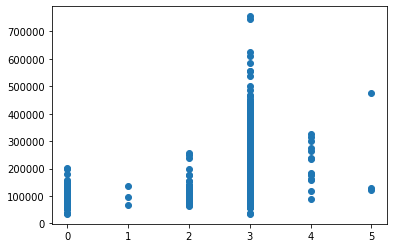

In [30]:
plt.plot(list(Train_ordinal_df1['GarageQual']),list(df_train['SalePrice']),'o')

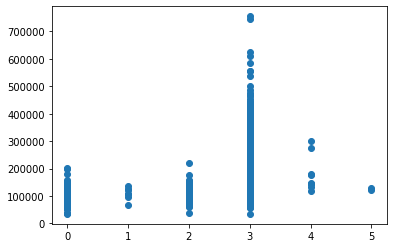

In [31]:
plt.plot(list(Train_ordinal_df1['GarageCond']),list(df_train['SalePrice']),'o')

In [32]:
Train_ordinal_df1['GarageQual'].value_counts()

3.0    1311
0.0      81
2.0      48
4.0      14
5.0       3
1.0       3
Name: GarageQual, dtype: int64

In [33]:
Train_ordinal_df1['GarageCond'].value_counts()

3.0    1326
0.0      81
2.0      35
4.0       9
1.0       7
5.0       2
Name: GarageCond, dtype: int64

In [34]:
Train_ordinal_df1.query('GarageCond == GarageQual').count()

ExterQual       1401
ExterCond       1401
BsmtQual        1401
BsmtCond        1401
HeatingQC       1401
KitchenQual     1401
FireplaceQu     1401
GarageQual      1401
GarageCond      1401
PoolQC          1401
BsmtExposure    1401
GarageFinish    1401
dtype: int64

##### Grage Quality And Condition Are The same So we drop One Of them

#### Now WE Process The Exterior Quality and Condition

In [35]:
Train_ordinal_df1['ExterQual'].value_counts()

3.0    906
4.0    488
5.0     52
2.0     14
Name: ExterQual, dtype: int64

In [36]:
Train_ordinal_df1['ExterCond'].value_counts()

3.0    1282
4.0     146
2.0      28
5.0       3
1.0       1
Name: ExterCond, dtype: int64

In [37]:
Train_ordinal_df1.query('ExterQual==ExterCond').count()

ExterQual       815
ExterCond       815
BsmtQual        815
BsmtCond        815
HeatingQC       815
KitchenQual     815
FireplaceQu     815
GarageQual      815
GarageCond      815
PoolQC          815
BsmtExposure    815
GarageFinish    815
dtype: int64

##### There Ara also Basement Quality And Condition

In [38]:
Train_ordinal_df1['BsmtQual'].value_counts()

3.0    649
4.0    618
5.0    121
0.0     37
2.0     35
Name: BsmtQual, dtype: int64

In [39]:
Train_ordinal_df1['BsmtCond'].value_counts()

3.0    1311
4.0      65
2.0      45
0.0      37
1.0       2
Name: BsmtCond, dtype: int64

In [40]:
Train_ordinal_df1.query('BsmtQual==BsmtCond').count()

ExterQual       677
ExterCond       677
BsmtQual        677
BsmtCond        677
HeatingQC       677
KitchenQual     677
FireplaceQu     677
GarageQual      677
GarageCond      677
PoolQC          677
BsmtExposure    677
GarageFinish    677
dtype: int64

In [41]:
#Pool Quality
Train_ordinal_df1['PoolQC'].value_counts()

0.0    1453
4.0       3
5.0       2
2.0       2
Name: PoolQC, dtype: int64

In [42]:
#Heating Quality
Train_ordinal_df1['HeatingQC'].value_counts()

5.0    741
3.0    428
4.0    241
2.0     49
1.0      1
Name: HeatingQC, dtype: int64

In [43]:
#FirePlace Quality
Train_ordinal_df1['FireplaceQu'].value_counts()

0.0    690
4.0    380
3.0    313
2.0     33
5.0     24
1.0     20
Name: FireplaceQu, dtype: int64

In [44]:
# The Precent Of Garage finishing
Train_ordinal_df1['GarageFinish'].value_counts()

1.0    605
2.0    422
3.0    352
0.0     81
Name: GarageFinish, dtype: int64

##### From What We See We Decide To Delete Some Unneeded Columns

In [45]:
# The Columns That Is Ordinal Values
total_ordinal_col=Train_ordinal_df1.columns
# The Columns That Is Ordinal Values
total_ordinal_col=Train_ordinal_df1.columns
# Drop The UnNeeded Columns
Columns_Drop1=['GarageCond','ExterCond','BsmtCond','PoolQC']
Train_ordinal_df1.drop(Columns_Drop1,axis=1,inplace=True)
Test_ordinal_df2.drop(Columns_Drop1,axis=1,inplace=True)
Train_ordinal_df1.head()


,ExterQual,BsmtQual,HeatingQC,KitchenQual,FireplaceQu,GarageQual,BsmtExposure,GarageFinish
Id,,,,,,,,
1,4.0,4.0,5.0,4.0,0.0,3.0,1.0,2.0
2,3.0,4.0,5.0,3.0,3.0,3.0,4.0,2.0
3,4.0,4.0,5.0,4.0,3.0,3.0,2.0,2.0
4,3.0,3.0,4.0,4.0,4.0,3.0,1.0,1.0
5,4.0,4.0,5.0,4.0,3.0,3.0,3.0,2.0


In [46]:
Train_ordinal_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ExterQual     1460 non-null   float64
 1   BsmtQual      1460 non-null   float64
 2   HeatingQC     1460 non-null   float64
 3   KitchenQual   1460 non-null   float64
 4   FireplaceQu   1460 non-null   float64
 5   GarageQual    1460 non-null   float64
 6   BsmtExposure  1460 non-null   float64
 7   GarageFinish  1460 non-null   float64
dtypes: float64(8)
memory usage: 102.7 KB


In [47]:
Test_ordinal_df2.head()

,ExterQual,BsmtQual,HeatingQC,KitchenQual,FireplaceQu,GarageQual,BsmtExposure,GarageFinish
Id,,,,,,,,
1461,3.0,3.0,3.0,3.0,0.0,3.0,1.0,1.0
1462,3.0,3.0,3.0,4.0,0.0,3.0,1.0,1.0
1463,3.0,4.0,4.0,3.0,3.0,3.0,1.0,3.0
1464,3.0,3.0,5.0,4.0,4.0,3.0,1.0,3.0
1465,4.0,4.0,5.0,4.0,0.0,3.0,1.0,2.0


### Categorical Columns Mapping Using OneHot Encoding 

In [48]:
# The Columns That Is Ordinal Values
total_ordinal_col=Train_ordinal_df1.columns

In [49]:
# Collect The The remaining Categorical Columns
categorical=[]

for col in categorical_column:
    # If The Column Name Is Not In Ordinal DataFrame Then add It To The list 
    if col not in total_ordinal_col:
        categorical.append(col)

print('\nThe List Of Columns Name : \n',categorical,'\n\n The Number OF Columns:',len(categorical))


The List Of Columns Name : 
 ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterCond', 'Foundation', 'BsmtCond', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageType', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'] 

 The Number OF Columns: 35


###### Plot The Columns With sales Price and Decide What Can Be Mapped using oneHot Encodding

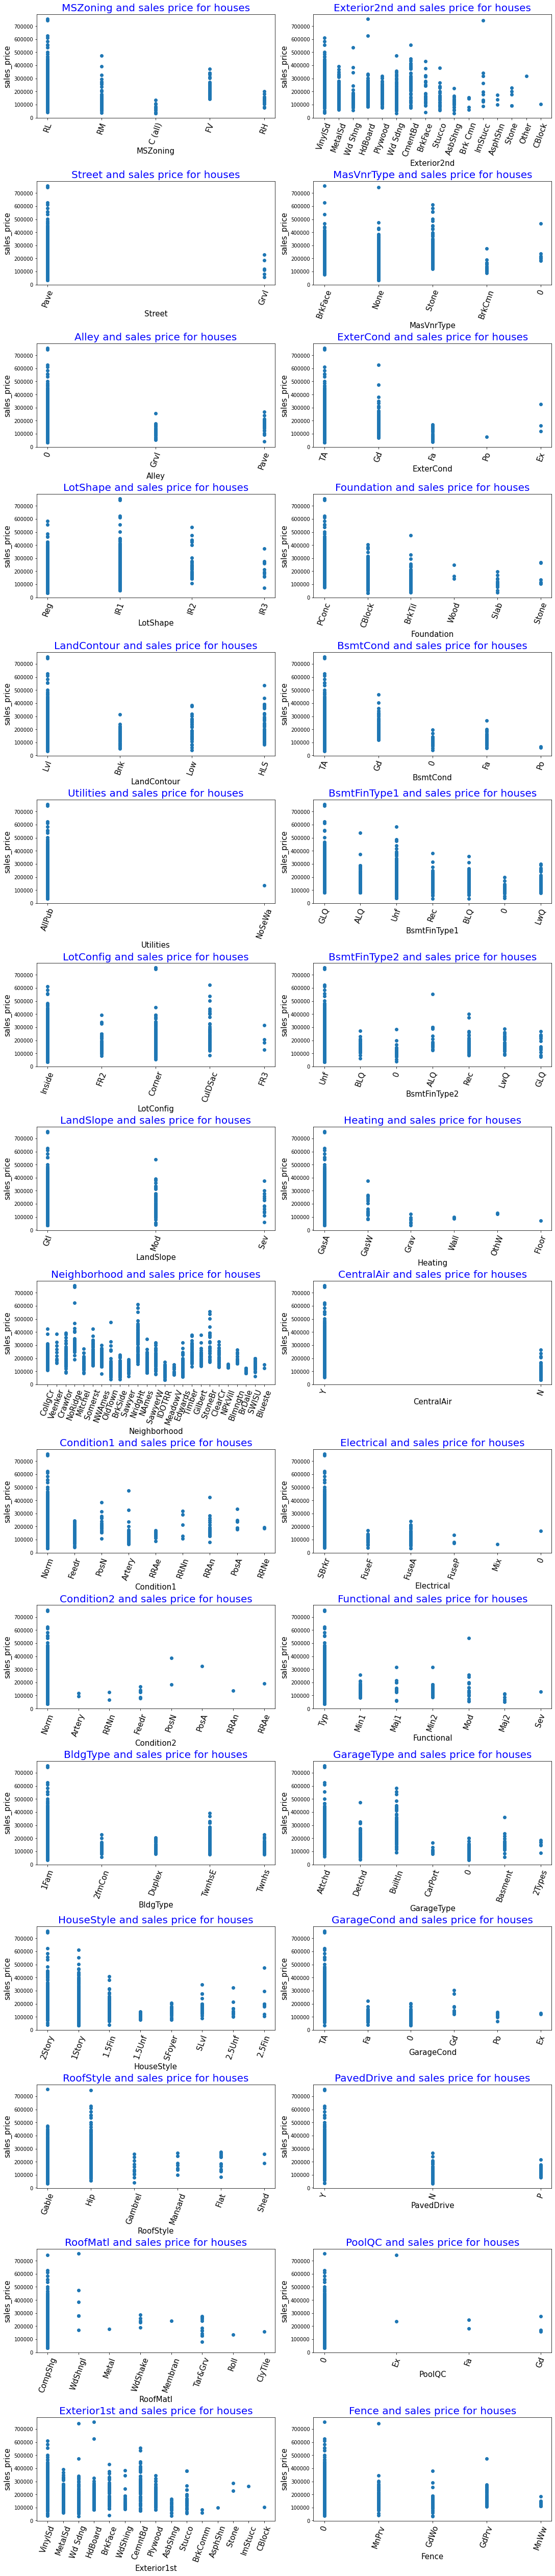

In [50]:
fig = plt.figure(constrained_layout=True,figsize=(15,70))
axs =fig.subplots(nrows=16, ncols=2)
count=0
for i in range(2):
    for j in range(16):
        if count<len(categorical):
            col=categorical[count]
            count+=1
            axs[j,i].plot(list(df_train[col]),list(df_train['SalePrice']),'o')
            axs[j,i].set_title(col+" and sales price for houses",fontsize=20,color='b')
            axs[j,i].set_xlabel(col,fontsize=15)
            axs[j,i].set_ylabel("sales_price",fontsize=15)
            axs[j,i].tick_params(axis='x',rotation=70,labelsize=15)
            axs[j,i].tick_params(axis='y',labelsize=10)

In [51]:
#Heating Type
df_train['Heating'].value_counts()

GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64

#### Choose One OF the Exterior

In [52]:
df_train['Exterior1st'].value_counts()

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
AsphShn      1
ImStucc      1
CBlock       1
Name: Exterior1st, dtype: int64

In [53]:
df_train['Exterior2nd'].value_counts()

VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: Exterior2nd, dtype: int64

In [54]:
df_train.query('Exterior1st == Exterior2nd').count()

MSSubClass       1245
MSZoning         1245
LotFrontage      1245
LotArea          1245
Street           1245
                 ... 
MoSold           1245
YrSold           1245
SaleType         1245
SaleCondition    1245
SalePrice        1245
Length: 80, dtype: int64

#### Choose One Of the Condition Columns

In [55]:
# Condition OF The House
df_train['Condition1'].value_counts()

Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

In [56]:
#Condition Of The Matrial Of The house
df_train['Condition2'].value_counts()

Norm      1445
Feedr        6
Artery       2
RRNn         2
PosN         2
PosA         1
RRAn         1
RRAe         1
Name: Condition2, dtype: int64

In [57]:
df_train.query('Condition1==Condition2').count()

MSSubClass       1265
MSZoning         1265
LotFrontage      1265
LotArea          1265
Street           1265
                 ... 
MoSold           1265
YrSold           1265
SaleType         1265
SaleCondition    1265
SalePrice        1265
Length: 80, dtype: int64

In [58]:
#Functional
df_train['Functional'].value_counts()

Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64

In [59]:
# The Allry Type
df_train['Alley'].value_counts()

0       1369
Grvl      50
Pave      41
Name: Alley, dtype: int64

In [60]:
# Street type
df_train['Street'].value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

#### From Plots, The Statistics OF data The Chosen Columns To One Hot Encodding

In [61]:
one_hot_encoding=['MSZoning','Foundation','BsmtFinType1','Neighborhood','GarageType','PavedDrive','BldgType','HouseStyle',
                 'RoofStyle','SaleType','SaleCondition','Exterior1st','CentralAir']
print('The Length OF The List: ',len(one_hot_encoding))

The Length OF The List:  13


In [62]:
#Train Data
one_hot_df1=df_train[one_hot_encoding].copy()
#TestData
one_hot_df2=df_test[one_hot_encoding]

In [63]:
one_hot_df1.head()

,MSZoning,Foundation,BsmtFinType1,Neighborhood,GarageType,PavedDrive,BldgType,HouseStyle,RoofStyle,SaleType,SaleCondition,Exterior1st,CentralAir
Id,,,,,,,,,,,,,
1,RL,PConc,GLQ,CollgCr,Attchd,Y,1Fam,2Story,Gable,WD,Normal,VinylSd,Y
2,RL,CBlock,ALQ,Veenker,Attchd,Y,1Fam,1Story,Gable,WD,Normal,MetalSd,Y
3,RL,PConc,GLQ,CollgCr,Attchd,Y,1Fam,2Story,Gable,WD,Normal,VinylSd,Y
4,RL,BrkTil,ALQ,Crawfor,Detchd,Y,1Fam,2Story,Gable,WD,Abnorml,Wd Sdng,Y
5,RL,PConc,GLQ,NoRidge,Attchd,Y,1Fam,2Story,Gable,WD,Normal,VinylSd,Y


In [64]:
one_hot_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Foundation     1460 non-null   object
 2   BsmtFinType1   1460 non-null   object
 3   Neighborhood   1460 non-null   object
 4   GarageType     1460 non-null   object
 5   PavedDrive     1460 non-null   object
 6   BldgType       1460 non-null   object
 7   HouseStyle     1460 non-null   object
 8   RoofStyle      1460 non-null   object
 9   SaleType       1460 non-null   object
 10  SaleCondition  1460 non-null   object
 11  Exterior1st    1460 non-null   object
 12  CentralAir     1460 non-null   object
dtypes: object(13)
memory usage: 159.7+ KB


In [65]:
one_hot_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 1461 to 2919
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1459 non-null   object
 1   Foundation     1459 non-null   object
 2   BsmtFinType1   1459 non-null   object
 3   Neighborhood   1459 non-null   object
 4   GarageType     1459 non-null   object
 5   PavedDrive     1459 non-null   object
 6   BldgType       1459 non-null   object
 7   HouseStyle     1459 non-null   object
 8   RoofStyle      1459 non-null   object
 9   SaleType       1459 non-null   object
 10  SaleCondition  1459 non-null   object
 11  Exterior1st    1459 non-null   object
 12  CentralAir     1459 non-null   object
dtypes: object(13)
memory usage: 159.6+ KB


In [66]:
x = one_hot_df2.loc[:]
x = x.astype(str)

In [67]:
#OneHotEncodding
one_hot_df1 = pd.get_dummies(one_hot_df1, prefix=one_hot_encoding, columns=one_hot_encoding, drop_first=True)
one_hot_df2 = pd.get_dummies(one_hot_df2, prefix=one_hot_encoding, columns=one_hot_encoding, drop_first=True)

In [68]:
one_hot_df1.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtFinType1_ALQ,...,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,CentralAir_Y
Id,,,,,,,,,,,,,,,,,,,,,
1,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
3,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
5,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [69]:
one_hot_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 91 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   MSZoning_FV            1460 non-null   uint8
 1   MSZoning_RH            1460 non-null   uint8
 2   MSZoning_RL            1460 non-null   uint8
 3   MSZoning_RM            1460 non-null   uint8
 4   Foundation_CBlock      1460 non-null   uint8
 5   Foundation_PConc       1460 non-null   uint8
 6   Foundation_Slab        1460 non-null   uint8
 7   Foundation_Stone       1460 non-null   uint8
 8   Foundation_Wood        1460 non-null   uint8
 9   BsmtFinType1_ALQ       1460 non-null   uint8
 10  BsmtFinType1_BLQ       1460 non-null   uint8
 11  BsmtFinType1_GLQ       1460 non-null   uint8
 12  BsmtFinType1_LwQ       1460 non-null   uint8
 13  BsmtFinType1_Rec       1460 non-null   uint8
 14  BsmtFinType1_Unf       1460 non-null   uint8
 15  Neighborhood_Blueste   1460 non-null  

In [70]:
one_hot_df2.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,...,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,CentralAir_Y
Id,,,,,,,,,,,,,,,,,,,,,
1461,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1462,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1463,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1464,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1465,0,0,0,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [71]:
dropped_column=[col for col in categorical if col not in one_hot_encoding ]
print("The Not Used Columns:\n",dropped_column,'\n\n The Len OF Coulmns',len(dropped_column))

The Not Used Columns:
 ['Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Condition1', 'Condition2', 'RoofMatl', 'Exterior2nd', 'MasVnrType', 'ExterCond', 'BsmtCond', 'BsmtFinType2', 'Heating', 'Electrical', 'Functional', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature'] 

 The Len OF Coulmns 22


### Numerical DataFrame

In [72]:
# Select numerical columns

numerical_cols = [col for col in df_train.columns if 
                (df_train[col].dtype in ['int64', 'float64']) and col!='SalePrice']
print(" Numerical Column:\n",numerical_cols,"\n\n Len OF Columns: ",len(numerical_cols))

 Numerical Column:
 ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold'] 

 Len OF Columns:  36


In [73]:
numerical_df1=df_train[numerical_cols].copy()
numerical_df2=df_test[numerical_cols].copy()

In [74]:
numerical_df1.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,548,0,61,0,0,0,0,0,2,2008
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,460,298,0,0,0,0,0,0,5,2007
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,608,0,42,0,0,0,0,0,9,2008
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,642,0,35,272,0,0,0,0,2,2006
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,836,192,84,0,0,0,0,0,12,2008


In [75]:
numerical_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 36 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   LotFrontage    1460 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   OverallQual    1460 non-null   int64  
 4   OverallCond    1460 non-null   int64  
 5   YearBuilt      1460 non-null   int64  
 6   YearRemodAdd   1460 non-null   int64  
 7   MasVnrArea     1460 non-null   float64
 8   BsmtFinSF1     1460 non-null   int64  
 9   BsmtFinSF2     1460 non-null   int64  
 10  BsmtUnfSF      1460 non-null   int64  
 11  TotalBsmtSF    1460 non-null   int64  
 12  1stFlrSF       1460 non-null   int64  
 13  2ndFlrSF       1460 non-null   int64  
 14  LowQualFinSF   1460 non-null   int64  
 15  GrLivArea      1460 non-null   int64  
 16  BsmtFullBath   1460 non-null   int64  
 17  BsmtHalfBath   1460 non-null   int64  
 18  FullBath

In [76]:
numerical_df1.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,...,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753
std,42.300571,22.024023,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,...,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,50.000000,70.049958,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000


In [77]:
numerical_df2.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,730.0,140,0,0,0,120,0,0,6,2010
1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,312.0,393,36,0,0,0,0,12500,6,2010
1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,482.0,212,34,0,0,0,0,0,3,2010
1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,...,470.0,360,36,0,0,0,0,0,6,2010
1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,...,506.0,0,82,0,0,144,0,0,1,2010


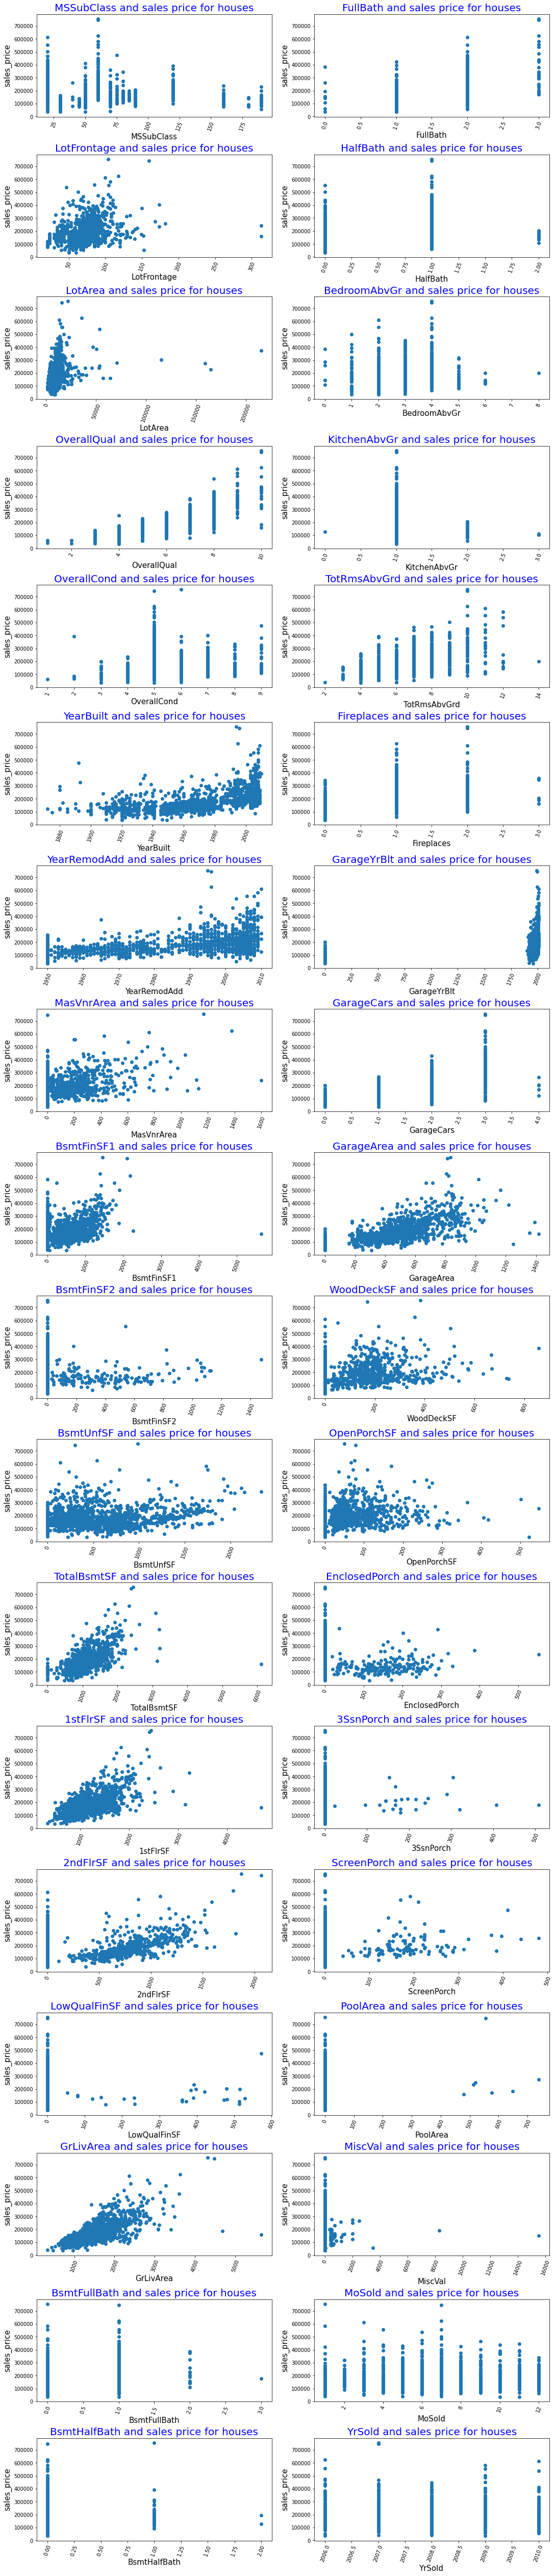

In [78]:
fig = plt.figure(constrained_layout=True,figsize=(15,70))
axs =fig.subplots(nrows=18, ncols=2)
count=0
for i in range(2):
    for j in range(18):
        if count<len(numerical_cols):
            col=numerical_cols[count]
            count+=1
            axs[j,i].plot(list(df_train[col]),list(df_train['SalePrice']),'o')
            axs[j,i].set_title(col+" and sales price for houses",fontsize=20,color='b')
            axs[j,i].set_xlabel(col,fontsize=15)
            axs[j,i].set_ylabel("sales_price",fontsize=15)
            axs[j,i].tick_params(axis='x',rotation=70,labelsize=10)
            axs[j,i].tick_params(axis='y',labelsize=10)

#### Explore The Data Area For The Basement

In [79]:
# 'TotalBsmtSF'='BsmtFinSF1'+ 'BsmtFinSF2'-'BsmtUnfSF'
df_train[['BsmtFinSF1','BsmtFinSF2','TotalBsmtSF','BsmtUnfSF','SalePrice']]

,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,BsmtUnfSF,SalePrice
Id,,,,,
1,706,0,856,150,208500
2,978,0,1262,284,181500
3,486,0,920,434,223500
4,216,0,756,540,140000
5,655,0,1145,490,250000
...,...,...,...,...,...
1456,0,0,953,953,175000
1457,790,163,1542,589,210000
1458,275,0,1152,877,266500


In [80]:
df_train[df_train['BsmtFinSF2']==0].count()

MSSubClass       1293
MSZoning         1293
LotFrontage      1293
LotArea          1293
Street           1293
                 ... 
MoSold           1293
YrSold           1293
SaleType         1293
SaleCondition    1293
SalePrice        1293
Length: 80, dtype: int64

In [81]:
df_train['2ndFlrSF'].value_counts()

0       829
728      10
504       9
546       8
672       8
       ... 
1538      1
914       1
1067      1
1000      1
1152      1
Name: 2ndFlrSF, Length: 417, dtype: int64

### Merging The Ordinal Categorical With Numerical Data

In [82]:
Train_ordinal_df1.head()

,ExterQual,BsmtQual,HeatingQC,KitchenQual,FireplaceQu,GarageQual,BsmtExposure,GarageFinish
Id,,,,,,,,
1,4.0,4.0,5.0,4.0,0.0,3.0,1.0,2.0
2,3.0,4.0,5.0,3.0,3.0,3.0,4.0,2.0
3,4.0,4.0,5.0,4.0,3.0,3.0,2.0,2.0
4,3.0,3.0,4.0,4.0,4.0,3.0,1.0,1.0
5,4.0,4.0,5.0,4.0,3.0,3.0,3.0,2.0


In [83]:
X_train_data=numerical_df1.merge(Train_ordinal_df1,left_index=True,right_index=True,how='inner')
#X_train_data=X_train_data.merge(one_hot_df1,left_index=True,right_index=True,how='inner')

X_train_data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,MoSold,YrSold,ExterQual,BsmtQual,HeatingQC,KitchenQual,FireplaceQu,GarageQual,BsmtExposure,GarageFinish
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,2,2008,4.0,4.0,5.0,4.0,0.0,3.0,1.0,2.0
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,5,2007,3.0,4.0,5.0,3.0,3.0,3.0,4.0,2.0
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,9,2008,4.0,4.0,5.0,4.0,3.0,3.0,2.0,2.0
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,2,2006,3.0,3.0,4.0,4.0,4.0,3.0,1.0,1.0
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,12,2008,4.0,4.0,5.0,4.0,3.0,3.0,3.0,2.0


In [84]:
y_train=df_train['SalePrice']

In [85]:
# Divide data into training and validation subsets
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X_train_data, y_train, train_size=0.9, test_size=0.1,
                                                                random_state=0)


In [86]:
X_train_full.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,MoSold,YrSold,ExterQual,BsmtQual,HeatingQC,KitchenQual,FireplaceQu,GarageQual,BsmtExposure,GarageFinish
Id,,,,,,,,,,,,,,,,,,,,,
931,20,73.000000,8925,8,5,2007,2007,0.0,16,0,...,7,2009,4.0,4.0,5.0,4.0,0.0,3.0,3.0,3.0
657,20,72.000000,10007,5,7,1959,2006,54.0,806,0,...,8,2008,4.0,3.0,5.0,4.0,0.0,3.0,1.0,2.0
46,120,61.000000,7658,9,5,2005,2005,412.0,456,0,...,2,2010,5.0,5.0,5.0,5.0,4.0,3.0,1.0,2.0
1349,20,70.049958,16196,7,5,1998,1998,0.0,1443,0,...,8,2007,4.0,4.0,5.0,4.0,2.0,3.0,4.0,2.0
56,20,100.000000,10175,6,5,1964,1964,272.0,490,0,...,7,2008,3.0,3.0,4.0,3.0,4.0,3.0,1.0,2.0


In [87]:
y_train.head()

Id
931     201000
657     145500
46      319900
1349    215000
56      180500
Name: SalePrice, dtype: int64

In [88]:
alphas=[0.1,0.3,0.4,0.5,0.8,0.9,1,2,3]

In [89]:
score=[]
for alp in alphas:
    clf =  make_pipeline(StandardScaler(),Lasso(alpha=alp, tol=0.0001)) 
    clf=clf.fit(X_train_full, y_train)
    preds1 =clf.predict(X_valid_full)
    score.append(r2_score(y_valid,preds1))
    print('R2_Score:', r2_score(y_valid,preds1),"alpha: ",alp)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.447e+10, tolerance: 8.204e+08
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.448e+10, tolerance: 8.204e+08
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

R2_Score: 0.7623143148696859 alpha:  0.1
R2_Score: 0.7623191215684729 alpha:  0.3
R2_Score: 0.762321524594561 alpha:  0.4


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.450e+10, tolerance: 8.204e+08
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


R2_Score: 0.7623239274051137 alpha:  0.5
R2_Score: 0.762330251325062 alpha:  0.8
R2_Score: 0.7623325261861458 alpha:  0.9
R2_Score: 0.762334821181924 alpha:  1
R2_Score: 0.7623577674813584 alpha:  2
R2_Score: 0.7623808759695101 alpha:  3


In [90]:
y_valid.isnull().sum()

0

In [91]:
initial_Learning_rate=[0.001,0.003,0.05,0.03,0.01,0.5,0.3,0.1]
for e in initial_Learning_rate:
    SGD =  make_pipeline(StandardScaler(),SGDRegressor(alpha=1.5,learning_rate='optimal',eta0=e,max_iter=100,tol=0.01)) 
    SGD=SGD.fit(X_train_full, y_train)
    preds1 =SGD.predict(X_valid_full)
    score.append(r2_score(y_valid,preds1))
    print('R2_Score:', r2_score(y_valid,preds1),"alpha: ",e)

R2_Score: 0.7425499591256259 alpha:  0.001
R2_Score: 0.7445675419178039 alpha:  0.003
R2_Score: 0.742892253486974 alpha:  0.05
R2_Score: 0.662833964412308 alpha:  0.03
R2_Score: -0.07349959619095081 alpha:  0.01
R2_Score: 0.744405046258775 alpha:  0.5
R2_Score: 0.7343441536710946 alpha:  0.3
R2_Score: 0.7171967002696116 alpha:  0.1


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1507: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1507: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1507: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1507: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


### Collect Test Dataframe

In [92]:
Test_ordinal_df2.head()

,ExterQual,BsmtQual,HeatingQC,KitchenQual,FireplaceQu,GarageQual,BsmtExposure,GarageFinish
Id,,,,,,,,
1461,3.0,3.0,3.0,3.0,0.0,3.0,1.0,1.0
1462,3.0,3.0,3.0,4.0,0.0,3.0,1.0,1.0
1463,3.0,4.0,4.0,3.0,3.0,3.0,1.0,3.0
1464,3.0,3.0,5.0,4.0,4.0,3.0,1.0,3.0
1465,4.0,4.0,5.0,4.0,0.0,3.0,1.0,2.0


In [93]:
X_test_data=numerical_df2.merge(Test_ordinal_df2,left_index=True,right_index=True,how='inner')

In [94]:
X_test_data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,MoSold,YrSold,ExterQual,BsmtQual,HeatingQC,KitchenQual,FireplaceQu,GarageQual,BsmtExposure,GarageFinish
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,6,2010,3.0,3.0,3.0,3.0,0.0,3.0,1.0,1.0
1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,6,2010,3.0,3.0,3.0,4.0,0.0,3.0,1.0,1.0
1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,3,2010,3.0,4.0,4.0,3.0,3.0,3.0,1.0,3.0
1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,...,6,2010,3.0,3.0,5.0,4.0,4.0,3.0,1.0,3.0
1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,...,1,2010,4.0,4.0,5.0,4.0,0.0,3.0,1.0,2.0


In [95]:

SGD =  make_pipeline(StandardScaler(),SGDRegressor(alpha=1.5,learning_rate='optimal',eta0=0.5,max_iter=100,tol=0.01)) 
SGD=SGD.fit(X_train_full, y_train)
preds1 =SGD.predict(X_valid_full)

print('MSE:', mean_squared_error(np.log(y_valid), np.log(preds1),squared=False))

MSE: 0.14444811536670465


In [96]:
preds_test = SGD.predict(X_test_data)

In [97]:
output = pd.DataFrame({'Id': X_test_data.index,
                       'SalePrice': preds_test})
output.to_csv('submission.csv', index=False)